In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


def get_conservation_path(dataset):
    return f'../../../data/features/conservation/{dataset}'
def get_indices_path(dataset):
    return f'../../../data/features/fluctuation/{dataset}/indices'
def get_fluctuation_path(dataset):
    return f'../../../data/features/fluctuation/{dataset}/fluctuation'
def get_distances_path(dataset):
    return f'../../../data/features/residue-distances/{dataset}'

In [5]:
def compute_mean_conservation(dataset):
    conservation_path = get_conservation_path(dataset)
    indices_path = get_indices_path(dataset)

    binding = []
    nonbinding = []

    for filename in os.listdir(conservation_path):
        conservation_data = np.load(os.path.join(conservation_path, filename))
        indices = np.load(os.path.join(indices_path, filename))
        
        binding.extend(conservation_data[indices])
        nonbinding.extend(np.delete(conservation_data, indices))
    
    print(f'CONSERVATION - {dataset}:')
    print(f'Mean binding conservation: {np.mean(binding)}')
    print(f'Mean nonbinding conservation: {np.mean(nonbinding)}')
    print()


def load_fluctuation_with_conservation(dataset):
    conservation_path = get_conservation_path(dataset)
    fluctuation_path = get_fluctuation_path(dataset)

    fluctuation_with_conservation = []
    fluctuation_without_conservation = []

    for filename in os.listdir(conservation_path):
        conservation_data = np.load(os.path.join(conservation_path, filename))
        fluctuations = np.load(os.path.join(fluctuation_path, filename)).transpose()

        # loop over the residues
        for residue_idx, residue_fluctuation in enumerate(fluctuations):
            # check which bin the distance of the residue falls into
                if conservation_data[residue_idx] > 0:
                    fluctuation_with_conservation.append(residue_fluctuation)
                else:
                    fluctuation_without_conservation.append(residue_fluctuation)
    
    fluctuation_with_conservation_transposed = []
    fluctuation_without_conservation_transposed = []

    for residues, residues_transposed in zip([fluctuation_with_conservation, fluctuation_without_conservation], [fluctuation_with_conservation_transposed, fluctuation_without_conservation_transposed]):
        # for each residue
        for residue in residues:
            for mode_index, mode_value in enumerate(residue):
                # if the mode is not yet in the bin, add it
                if len(residues_transposed) <= mode_index:
                    residues_transposed.append([])
                # add the residue to the correct mode
                residues_transposed[mode_index].append(mode_value)

    # free memory
    del fluctuation_with_conservation, fluctuation_without_conservation

    for residues_transposed in [fluctuation_with_conservation_transposed, fluctuation_without_conservation_transposed]:
        for i, fluctuation in enumerate(residues_transposed):
            residues_transposed[i] = np.array(fluctuation)

    return fluctuation_with_conservation_transposed, fluctuation_without_conservation_transposed


In [2]:
compute_mean_conservation('rigid-dataset')
compute_mean_conservation('cryptobench-dataset')

NameError: name 'get_conservation_path' is not defined

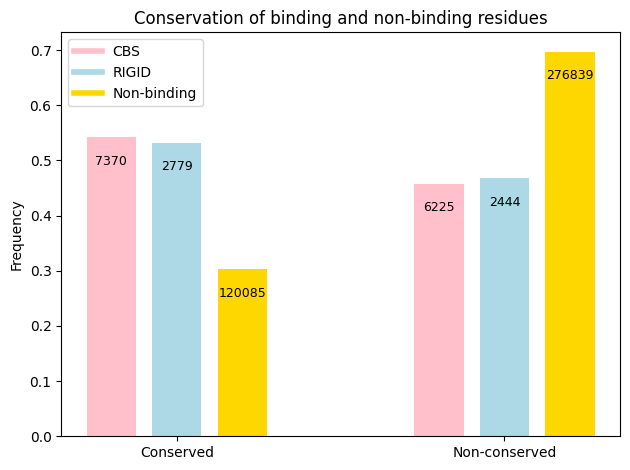

In [ ]:
colors = ['pink', 'lightblue', "gold"]

def plot_conservation():
    cbs_binding, rigid_binding, non_binding = [], [], []
    for dataset in ['rigid-dataset', 'cryptobench-dataset']:
        conservation_path = get_conservation_path(dataset)
        indices_path = get_indices_path(dataset)

        binding = []
        nonbinding = []

        for filename in os.listdir(conservation_path):
            conservation_data = np.load(os.path.join(conservation_path, filename))
            indices = np.load(os.path.join(indices_path, filename))

            binding.extend(conservation_data[indices])
            nonbinding.extend(np.delete(conservation_data, indices))
        
        if dataset == 'rigid-dataset':
            rigid_binding = binding
        else:
            cbs_binding = binding
        non_binding.extend(nonbinding)
    
    cbs_binding, rigid_binding, non_binding = np.array(cbs_binding), np.array(rigid_binding), np.array(non_binding)
    conserved = ([len(cbs_binding[cbs_binding >= 1]) / len(cbs_binding), len(rigid_binding[rigid_binding >= 1]) / len(rigid_binding), len(non_binding[non_binding >= 1]) / len(non_binding)],
                 [len(cbs_binding[cbs_binding >= 1]), len(rigid_binding[rigid_binding >= 1]), len(non_binding[non_binding >= 1])])
    
    non_conserved = ([len(cbs_binding[cbs_binding < 1]) / len(cbs_binding), len(rigid_binding[rigid_binding < 1]) / len(rigid_binding), len(non_binding[non_binding < 1]) / len(non_binding)],
                     [len(cbs_binding[cbs_binding < 1]), len(rigid_binding[rigid_binding < 1]), len(non_binding[non_binding < 1])])
    for i, values in enumerate((conserved, non_conserved)):
        bar = plt.bar([i-0.2, i, i+0.2], values[0], width=0.15)
        for ii, number in enumerate(values[1]):
            plt.text(i-0.2+ii*0.2, values[0][ii] - 0.05, f'{number}', fontsize = 9, ha = 'center')
        # fill with color:
        for i, patch in enumerate(bar.patches):
            patch.set_facecolor(colors[i])

    custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                    Line2D([0], [0], color=colors[1], lw=4),
                    Line2D([0], [0], color=colors[2], lw=4)]


    plt.legend(custom_lines, ['CBS', 'RIGID', 'Non-binding'])

    plt.xticks([0, 1], ['Conserved', 'Non-conserved'])
    plt.ylabel('Frequency')
    plt.title(f'Conservation of binding and non-binding residues')
    plt.tight_layout()
    plt.show()
plot_conservation()

Do conserved residues have higher/lower fluctuation?

In [ ]:
def print_combined_barchart(fluctuation_with_conservation, fluctuation_without_conservation, legend, title='', lim=None):
    plt.figure(figsize=(12, 6))
    data1 = [np.median(dato) for dato in fluctuation_with_conservation]
    data2 = [np.median(dato) for dato in fluctuation_without_conservation]
    ylim = max(np.max(data1), np.max(data2))
    
    if lim:
        plt.ylim(0, lim)
    else:
        plt.ylim(0, ylim)

    plt.bar(range(0, len(data1)), data1, width=1.0, alpha=0.7, label=legend[0])
    plt.bar(range(0, len(data2)), data2, width=1.0, alpha=0.5, label=legend[1])

    plt.title(title)
       
    plt.xlabel('Mode')
    plt.ylabel('Median Value')
    plt.legend()

    plt.tight_layout()
    plt.show()



In [ ]:
fluctuation_with_conservation_cryptobench, fluctuation_without_conservation_cryptobench = load_fluctuation_with_conservation('cryptobench-dataset')
fluctuation_with_conservation_rigid, fluctuation_without_conservation_rigid = load_fluctuation_with_conservation('rigid-dataset')

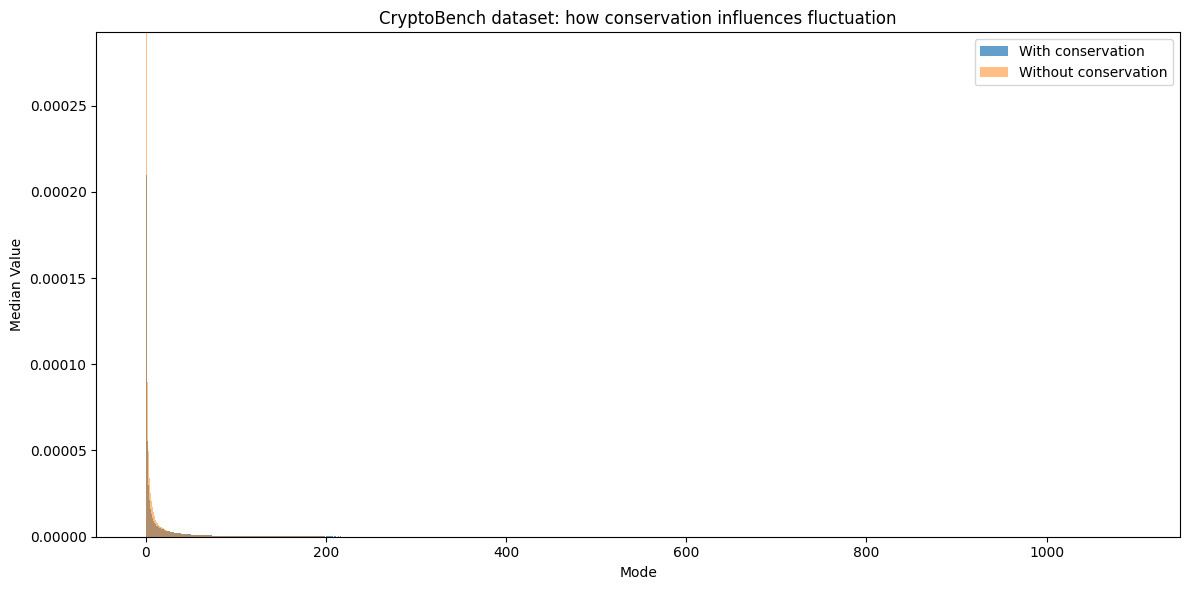

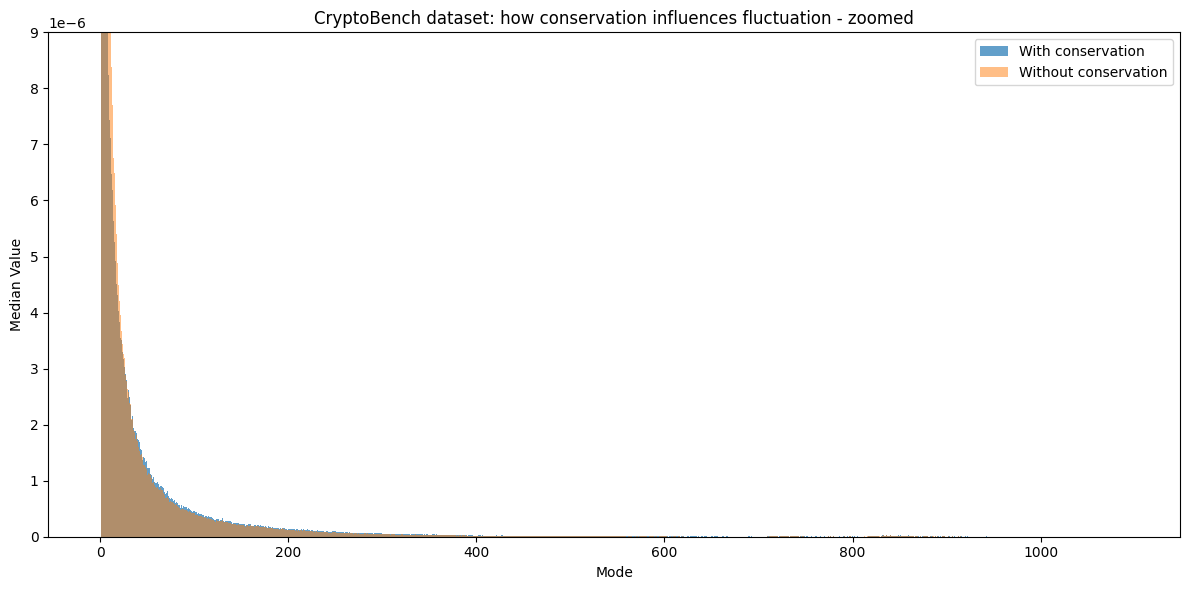

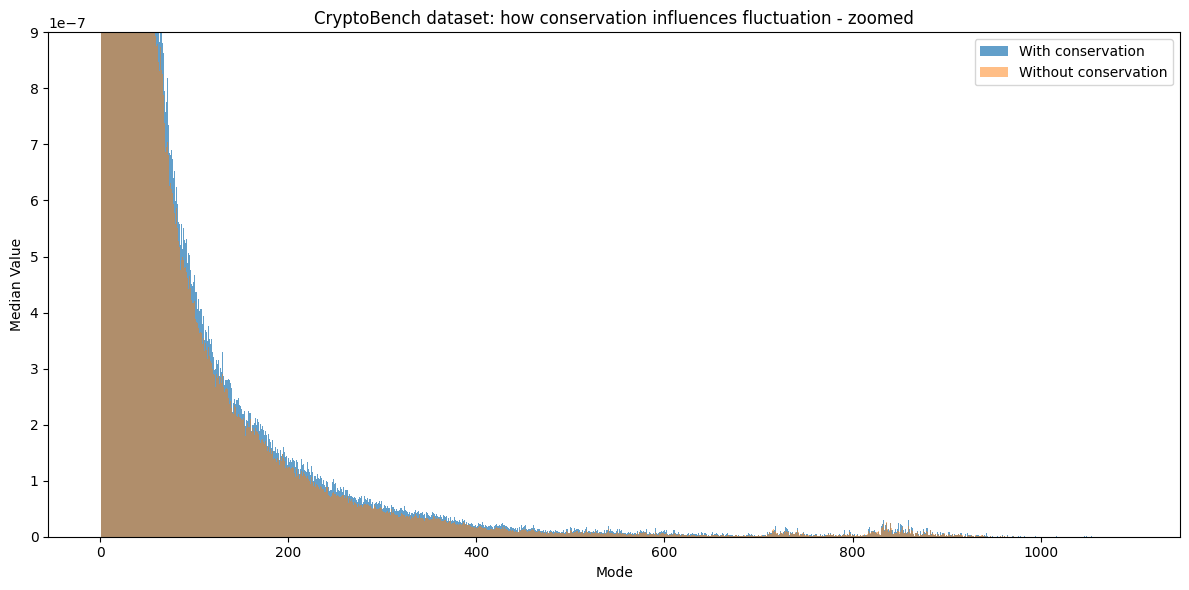

In [ ]:
print_combined_barchart(fluctuation_with_conservation_cryptobench, fluctuation_without_conservation_cryptobench, ['With conservation', 'Without conservation'], \
                         'CryptoBench dataset: how conservation influences fluctuation')
print_combined_barchart(fluctuation_with_conservation_cryptobench, fluctuation_without_conservation_cryptobench, ['With conservation', 'Without conservation'], \
                         'CryptoBench dataset: how conservation influences fluctuation - zoomed', lim=9e-06)
print_combined_barchart(fluctuation_with_conservation_cryptobench, fluctuation_without_conservation_cryptobench, ['With conservation', 'Without conservation'], \
                         'CryptoBench dataset: how conservation influences fluctuation - zoomed', lim=9e-07)

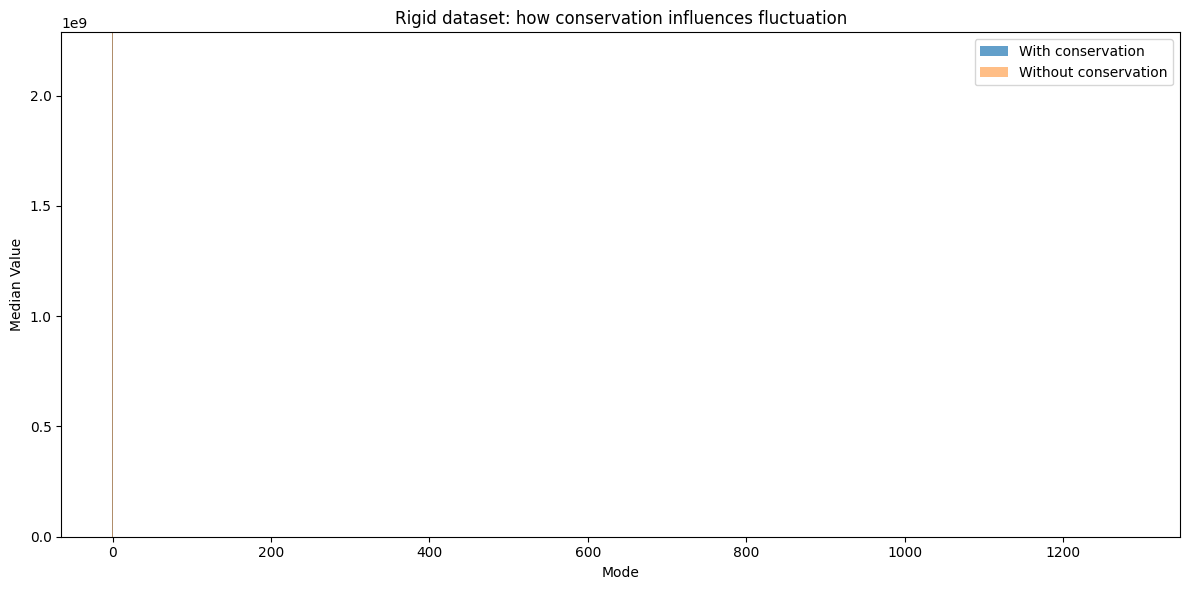

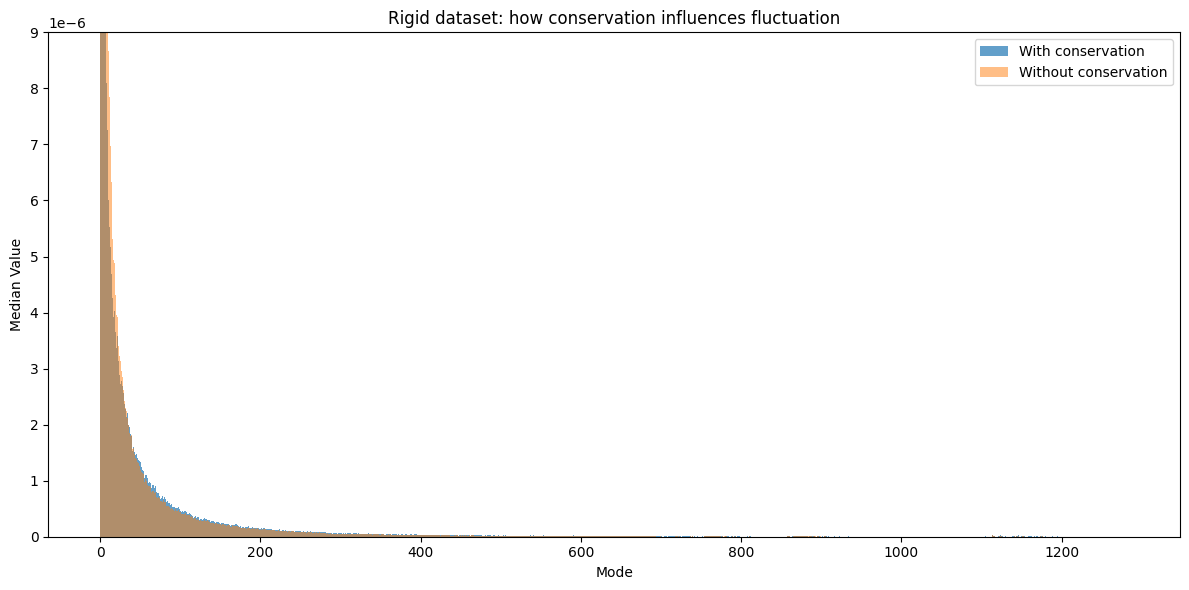

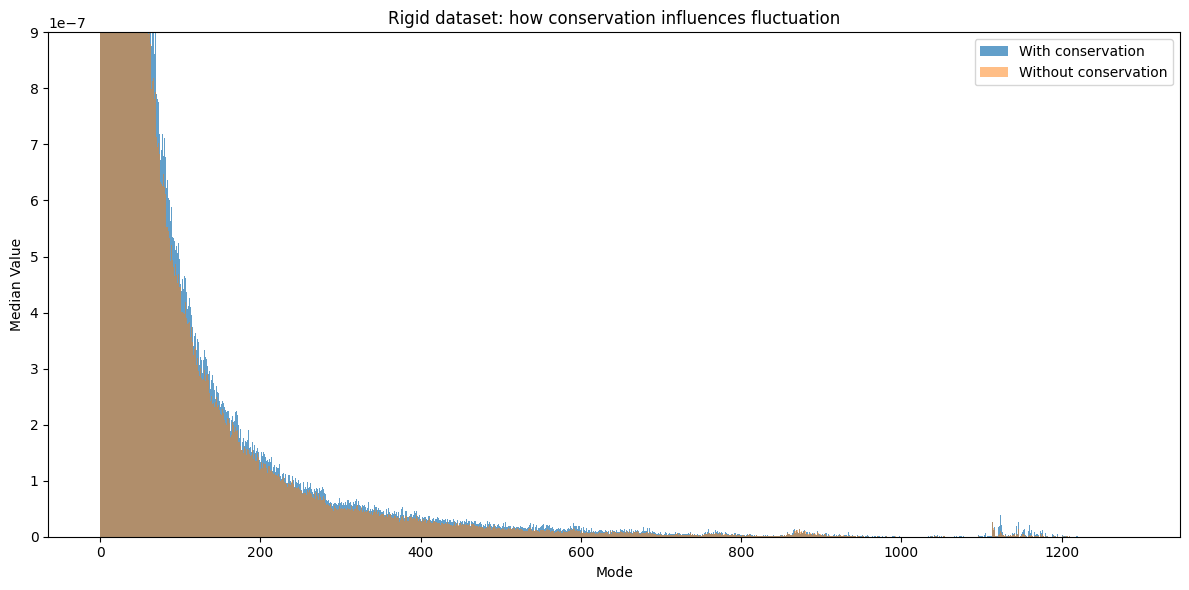

In [ ]:
print_combined_barchart(fluctuation_with_conservation_rigid, fluctuation_without_conservation_rigid, ['With conservation', 'Without conservation'], \
                         'Rigid dataset: how conservation influences fluctuation')
print_combined_barchart(fluctuation_with_conservation_rigid, fluctuation_without_conservation_rigid, ['With conservation', 'Without conservation'], \
                         'Rigid dataset: how conservation influences fluctuation', lim=9e-06)
print_combined_barchart(fluctuation_with_conservation_rigid, fluctuation_without_conservation_rigid, ['With conservation', 'Without conservation'], \
                         'Rigid dataset: how conservation influences fluctuation', lim=9e-07)

I don't see a difference between fluctuation of conserved and nonconserved residues, nor any patterns between rigid vs. cryptic 

Let's take a look how diverse are is the fluctuation: (let's show 25th and 75th quantile)

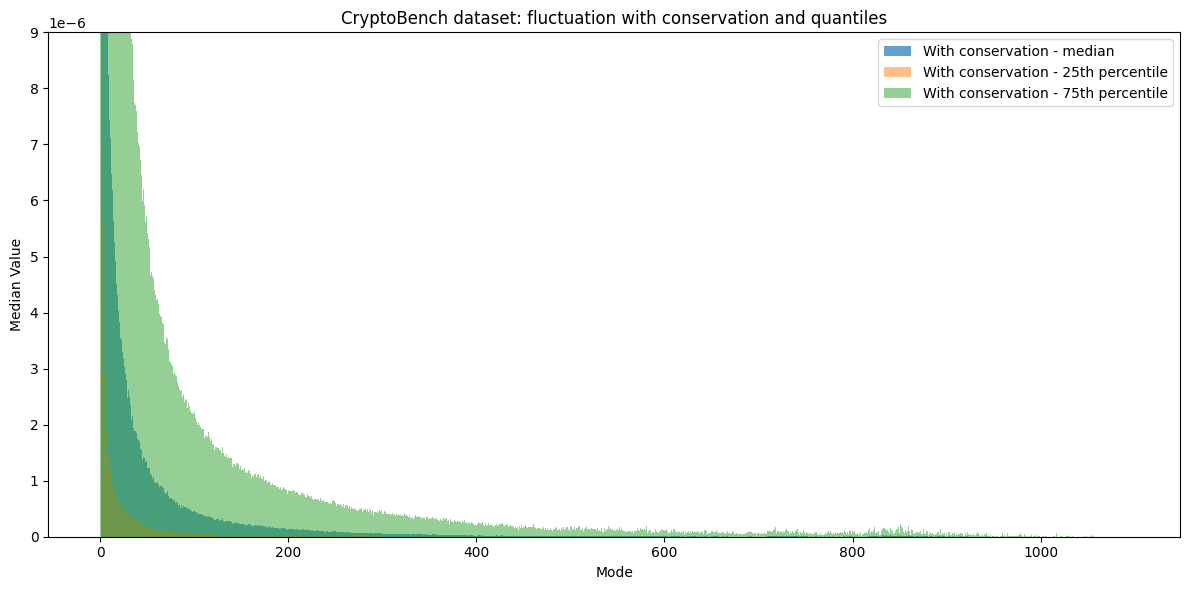

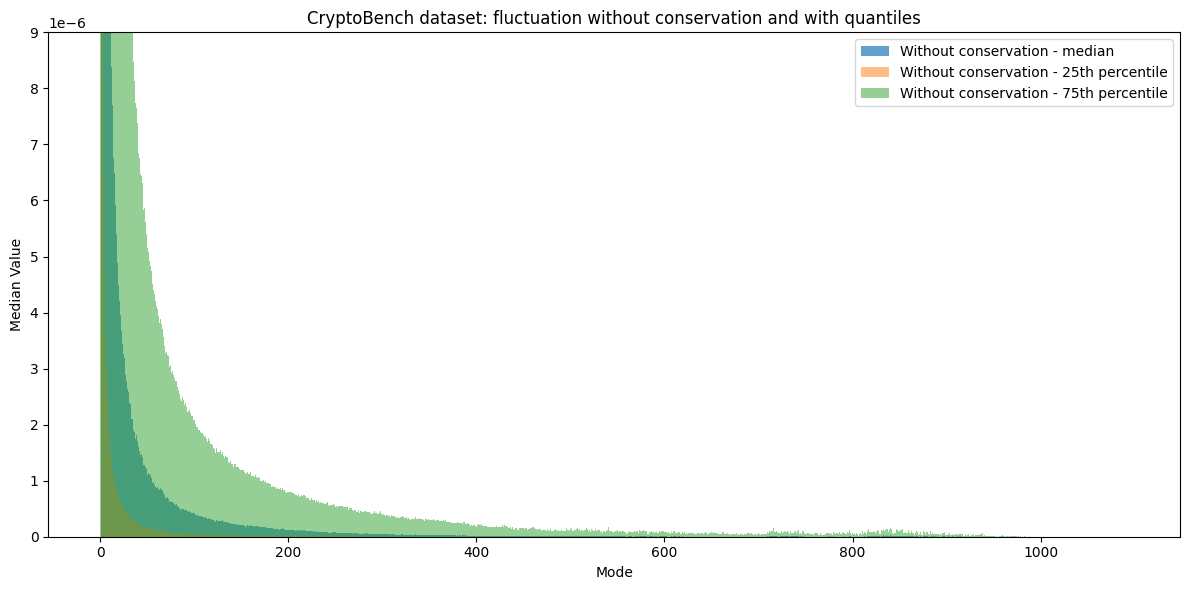

In [ ]:
def print_barchart_with_quantiles(fluctuation, legend, title='', lim=None):
    plt.figure(figsize=(12, 6))
    data1 = [np.median(dato) for dato in fluctuation]
    data2 = [np.quantile(dato, 0.25) for dato in fluctuation]
    data3 = [np.quantile(dato, 0.75) for dato in fluctuation]
    ylim = max(np.max(data1), np.max(data2))
    
    if lim:
        plt.ylim(0, lim)
    else:
        plt.ylim(0, ylim)

    plt.bar(range(0, len(data1)), data1, width=1.0, alpha=0.7, label=legend[0])
    plt.bar(range(0, len(data2)), data2, width=1.0, alpha=0.5, label=legend[1])
    plt.bar(range(0, len(data3)), data3, width=1.0, alpha=0.5, label=legend[2])

    plt.title(title)
       
    plt.xlabel('Mode')
    plt.ylabel('Median Value')
    plt.legend()

    plt.tight_layout()
    plt.show()

print_barchart_with_quantiles(fluctuation_with_conservation_cryptobench, ['With conservation - median', 'With conservation - 25th percentile', 'With conservation - 75th percentile'], 'CryptoBench dataset: fluctuation with conservation and quantiles', lim=9e-06)
print_barchart_with_quantiles(fluctuation_without_conservation_cryptobench, ['Without conservation - median', 'Without conservation - 25th percentile', 'Without conservation - 75th percentile'], 'CryptoBench dataset: fluctuation without conservation and with quantiles', lim=9e-06)

Still no visible difference ...

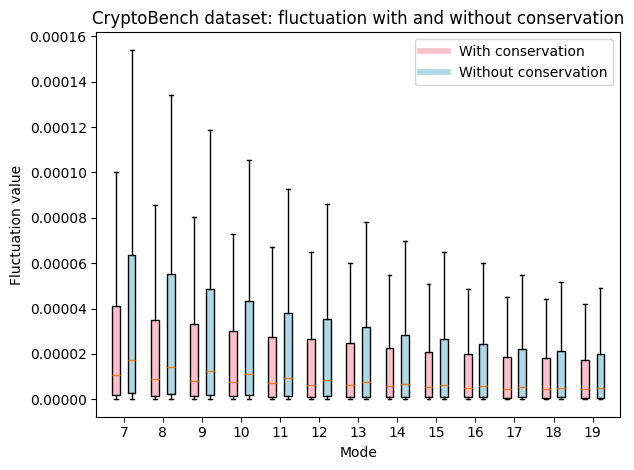

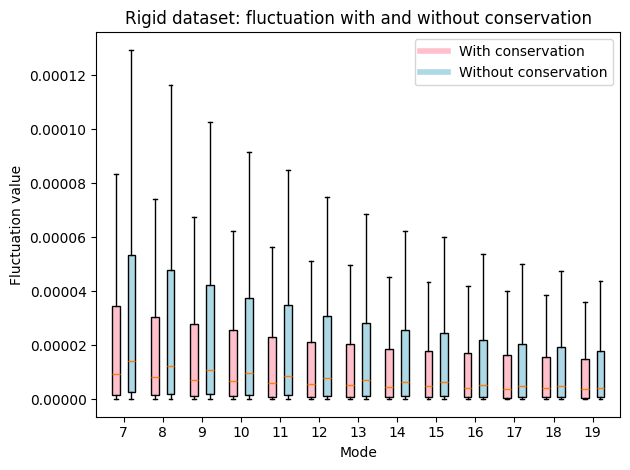

In [ ]:
from matplotlib.lines import Line2D

def boxplot(binned_fluctuation_by_distance1, binned_fluctuation_by_distance2, xlim=(7,20), ylim=None, title='', labels=['', '']):
    colors = ['pink', 'lightblue']
    x = np.array(list(range(xlim[0], xlim[1])))

    boxplot1 = plt.boxplot(binned_fluctuation_by_distance1[xlim[0]:xlim[1]],0,'',positions=x-0.2,widths=0.2, patch_artist=True)
    boxplot2 = plt.boxplot(binned_fluctuation_by_distance2[xlim[0]:xlim[1]],0,'',positions=x+0.2,widths=0.2, patch_artist=True)
    
    # fill with color:
    for bplot, color in zip((boxplot1, boxplot2), colors):
        for patch in bplot['boxes']:
            patch.set_facecolor(color)
    
    custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                    Line2D([0], [0], color=colors[1], lw=4)]

    plt.legend(custom_lines, labels)
    
    plt.xlabel('Mode')

    plt.xticks(x, x)
    if ylim:
        plt.ylim(0, ylim)
    # if xlim:
    #     plt.xlim(xlim[0], xlim[1])
    plt.ylabel('Fluctuation value')
    plt.title(title)
    plt.tight_layout()
    plt.show()

boxplot(fluctuation_with_conservation_cryptobench, fluctuation_without_conservation_cryptobench, title='CryptoBench dataset: fluctuation with and without conservation', labels=['With conservation', 'Without conservation'])
boxplot(fluctuation_with_conservation_rigid, fluctuation_without_conservation_rigid, title='Rigid dataset: fluctuation with and without conservation', labels=['With conservation', 'Without conservation'])

Sanity check:

In [ ]:
prev = np.inf
for i in fluctuation_with_conservation_cryptobench:
    # print(len(i))
    assert prev >= len(i)
    prev = len(i)

TODO: split by binding/nonbinding and try again ...

In [3]:
def load_fluctuation_with_conservation_and_binding(dataset):
    conservation_path = get_conservation_path(dataset)
    fluctuation_path = get_fluctuation_path(dataset)

    binding_fluctuation_with_conservation = []
    binding_fluctuation_without_conservation = []
    nonbinding_fluctuation_with_conservation = []
    nonbinding_fluctuation_without_conservation = []

    for filename in os.listdir(conservation_path):
        conservation_data = np.load(os.path.join(conservation_path, filename))
        fluctuations = np.load(os.path.join(fluctuation_path, filename)).transpose()
        indices = np.load(get_indices_path(dataset) + '/' + filename)
        # loop over the residues
        for residue_idx, residue_fluctuation in enumerate(fluctuations):
            # check which bin the distance of the residue falls into
                if conservation_data[residue_idx] > 0:
                    if residue_idx in indices:
                        binding_fluctuation_with_conservation.append(residue_fluctuation)
                    else:
                        nonbinding_fluctuation_with_conservation.append(residue_fluctuation)
                else:
                    if residue_idx in indices:
                        binding_fluctuation_without_conservation.append(residue_fluctuation)
                    else:
                        nonbinding_fluctuation_without_conservation.append(residue_fluctuation)
    
    binding_fluctuation_with_conservation_transposed = []
    binding_fluctuation_without_conservation_transposed = []
    nonbinding_fluctuation_with_conservation_transposed = []
    nonbinding_fluctuation_without_conservation_transposed = []

    for residues, residues_transposed in zip([binding_fluctuation_with_conservation, binding_fluctuation_without_conservation, nonbinding_fluctuation_with_conservation, nonbinding_fluctuation_without_conservation], [binding_fluctuation_with_conservation_transposed, binding_fluctuation_without_conservation_transposed, nonbinding_fluctuation_with_conservation_transposed, nonbinding_fluctuation_without_conservation_transposed]):
        # for each residue
        for residue in residues:
            for mode_index, mode_value in enumerate(residue):
                # if the mode is not yet in the bin, add it
                if len(residues_transposed) <= mode_index:
                    residues_transposed.append([])
                # add the residue to the correct mode
                residues_transposed[mode_index].append(mode_value)

    # free memory
    del binding_fluctuation_with_conservation, binding_fluctuation_without_conservation, nonbinding_fluctuation_with_conservation, nonbinding_fluctuation_without_conservation

    for residues_transposed in [binding_fluctuation_with_conservation_transposed, binding_fluctuation_without_conservation_transposed, nonbinding_fluctuation_with_conservation_transposed, nonbinding_fluctuation_without_conservation_transposed]:
        for i, fluctuation in enumerate(residues_transposed):
            residues_transposed[i] = np.array(fluctuation)

    return binding_fluctuation_with_conservation_transposed, binding_fluctuation_without_conservation_transposed, nonbinding_fluctuation_with_conservation_transposed, nonbinding_fluctuation_without_conservation_transposed

def boxplot3(binned_fluctuation_by_distance1, binned_fluctuation_by_distance2, binned_fluctuation_by_distance3, binned_fluctuation_by_distance4, xlim=(7,20), ylim=None, title='', labels=['', '', '', '']):
    plt.figure(figsize=(12, 6))
    colors = ['pink', 'lightblue', 'gold', 'palegreen']
    x = np.array(list(range(xlim[0], xlim[1])))

    boxplot1 = plt.boxplot(binned_fluctuation_by_distance1[xlim[0]:xlim[1]],0,'',positions=x-0.3,widths=0.1, patch_artist=True)
    boxplot2 = plt.boxplot(binned_fluctuation_by_distance2[xlim[0]:xlim[1]],0,'',positions=x-0.1,widths=0.1, patch_artist=True)
    boxplot3 = plt.boxplot(binned_fluctuation_by_distance3[xlim[0]:xlim[1]],0,'',positions=x+0.1,widths=0.1, patch_artist=True)
    boxplot4 = plt.boxplot(binned_fluctuation_by_distance4[xlim[0]:xlim[1]],0,'',positions=x+0.3,widths=0.1, patch_artist=True)
    
    # fill with color:
    for bplot, color in zip((boxplot1, boxplot2, boxplot3, boxplot4), colors):
        for patch in bplot['boxes']:
            patch.set_facecolor(color)
    
    custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                    Line2D([0], [0], color=colors[1], lw=4),
                    Line2D([0], [0], color=colors[2], lw=4),
                    Line2D([0], [0], color=colors[3], lw=4)]

    plt.legend(custom_lines, labels)
    
    plt.xlabel('Mode')

    plt.xticks(x, x)
    if ylim:
        plt.ylim(0, ylim)
    plt.ylabel('Fluctuation value')
    plt.title(title)
    plt.tight_layout()
    plt.show()


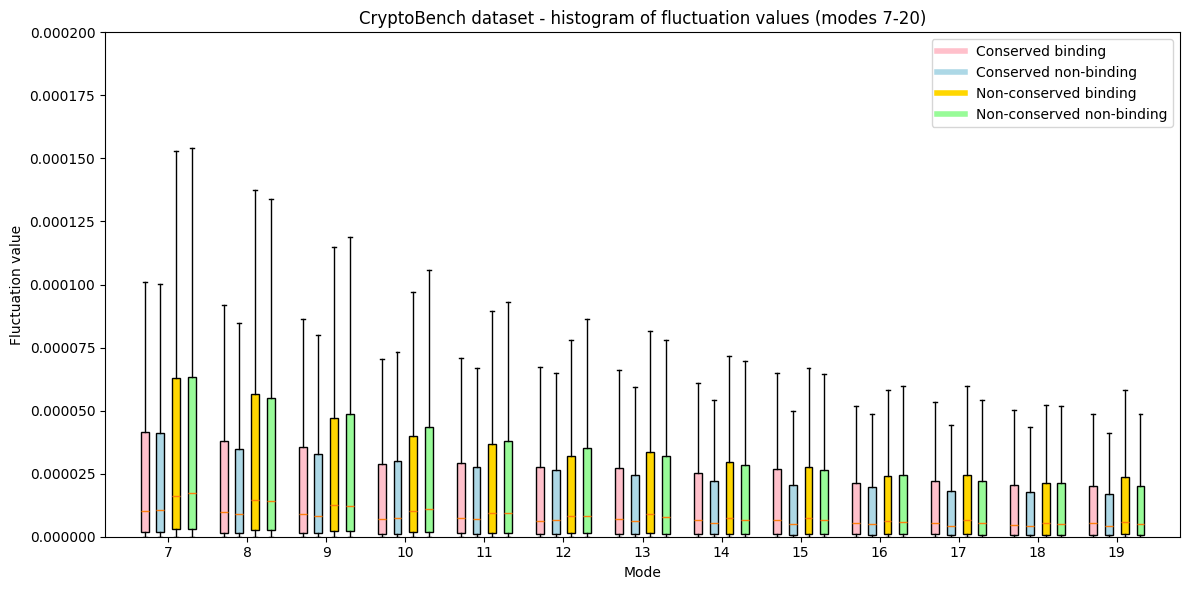

In [34]:
# binding_fluctuation_with_conservation_cryptobench, binding_fluctuation_without_conservation_cryptobench, nonbinding_fluctuation_with_conservation_cryptobench, nonbinding_fluctuation_without_conservation_cryptobench = \
#     load_fluctuation_with_conservation_and_binding('cryptobench-dataset')
boxplot3(binding_fluctuation_with_conservation_cryptobench, nonbinding_fluctuation_with_conservation_cryptobench,
         binding_fluctuation_without_conservation_cryptobench, nonbinding_fluctuation_without_conservation_cryptobench, 
         title='CryptoBench dataset - histogram of fluctuation values (modes 7-20)', ylim=2e-04, xlim=(7,20), labels=['Conserved binding', 'Conserved non-binding', 'Non-conserved binding', 'Non-conserved non-binding'])

In [1]:
def boxplot4(datasets, xlim=(7,20), ylim=None, title='', labels=['', '', '', '']):
    plt.figure(figsize=(12, 6))
    colors = ['pink', 'lightblue', 'palegreen', 'red', 'blue', 'green', 'yellow', 'purple'] # , 'orange', 'brown']
    x = np.array(list(range(xlim[0], xlim[1])))

    boxplots = []
    for i, dataset in enumerate(datasets):
        boxplot = plt.boxplot(dataset[xlim[0]:xlim[1]],0,'',positions=x-0.35+(i*0.15),widths=0.1, patch_artist=True)
        boxplots.append(boxplot)    

    # fill with color:
    for bplot, color in zip(boxplots, colors):
        for patch in bplot['boxes']:
            patch.set_facecolor(color)
    
    custom_lines = [Line2D([0], [0], color=c, lw=4) for c in colors]

    plt.legend(custom_lines, labels)
    
    plt.xlabel('Mode')

    plt.xticks(x, x)
    if ylim:
        plt.ylim(0, ylim)
    plt.ylabel('Fluctuation value')
    plt.title(title)
    plt.tight_layout()
    plt.show()


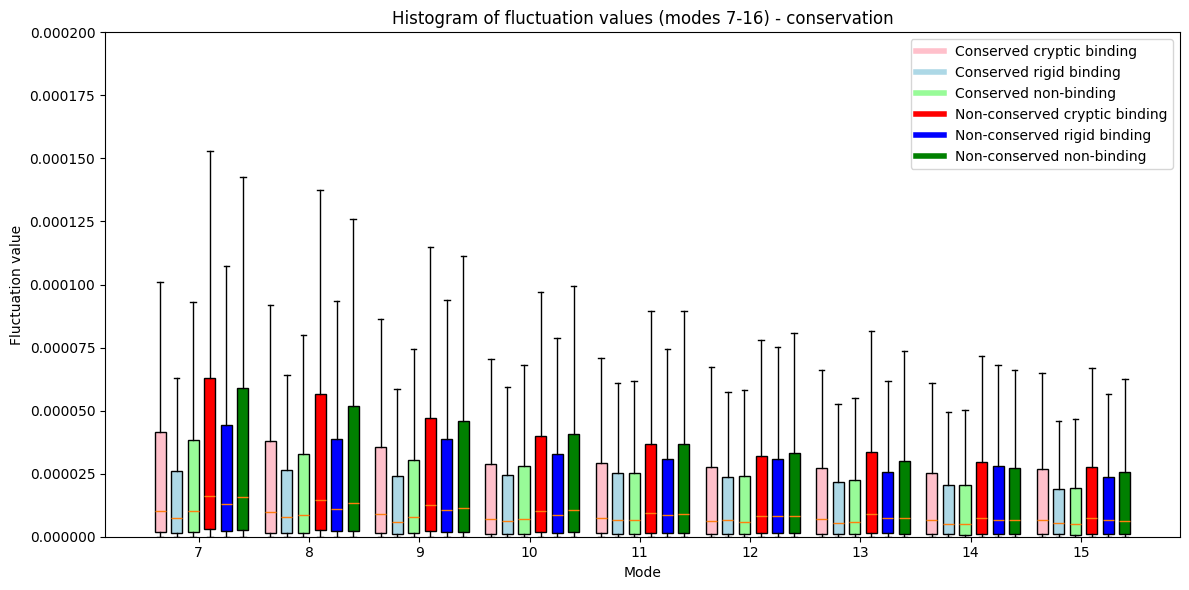

In [6]:
binding_fluctuation_with_conservation_cryptobench, binding_fluctuation_without_conservation_cryptobench, nonbinding_fluctuation_with_conservation_cryptobench, nonbinding_fluctuation_without_conservation_cryptobench = \
    load_fluctuation_with_conservation_and_binding('cryptobench-dataset')
binding_fluctuation_with_conservation_rigid, binding_fluctuation_without_conservation_rigid, nonbinding_fluctuation_with_conservation_rigid, nonbinding_fluctuation_without_conservation_rigid = \
    load_fluctuation_with_conservation_and_binding('rigid-dataset')

nonbinding_fluctuation_with_conservation, nonbinding_fluctuation_without_conservation = [], []
for i in range(len(nonbinding_fluctuation_with_conservation_cryptobench)):
    nonbinding_fluctuation_with_conservation.append(np.concatenate((nonbinding_fluctuation_with_conservation_rigid[i], nonbinding_fluctuation_with_conservation_cryptobench[i])))
    nonbinding_fluctuation_without_conservation.append(np.concatenate((nonbinding_fluctuation_without_conservation_rigid[i], nonbinding_fluctuation_without_conservation_cryptobench[i])))

boxplot4([binding_fluctuation_with_conservation_cryptobench, binding_fluctuation_with_conservation_rigid, nonbinding_fluctuation_with_conservation,
         binding_fluctuation_without_conservation_cryptobench, binding_fluctuation_without_conservation_rigid, nonbinding_fluctuation_without_conservation],
         title='Histogram of fluctuation values (modes 7-16) - conservation', ylim=2e-04, xlim=(7,16), 
         labels=['Conserved cryptic binding', 'Conserved rigid binding', 'Conserved non-binding', 
                 'Non-conserved cryptic binding', 'Non-conserved rigid binding', 'Non-conserved non-binding'])

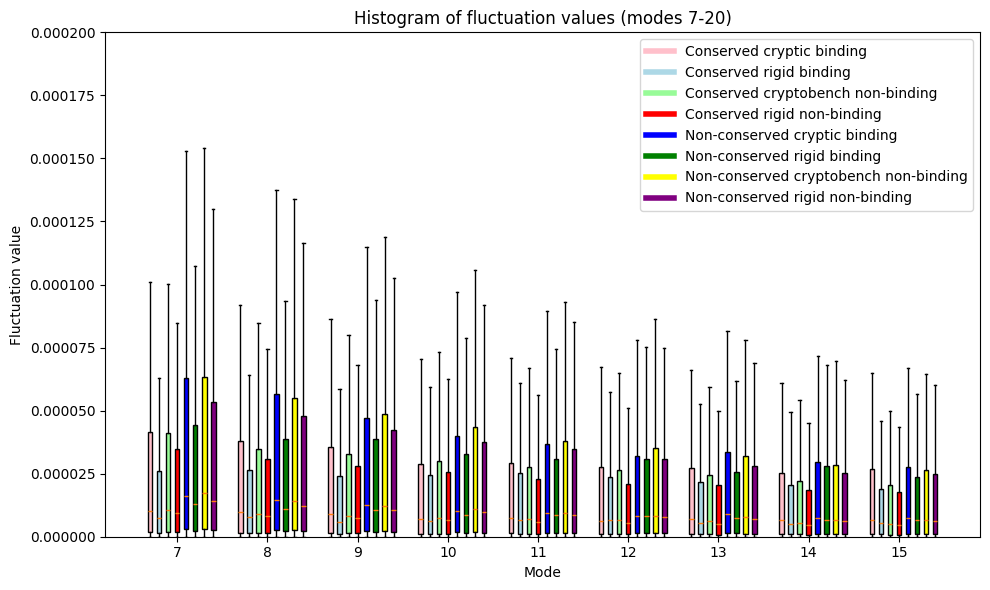

In [57]:
# binding_fluctuation_with_conservation_cryptobench, binding_fluctuation_without_conservation_cryptobench, nonbinding_fluctuation_with_conservation_cryptobench, nonbinding_fluctuation_without_conservation_cryptobench = \
#     load_fluctuation_with_conservation_and_binding('cryptobench-dataset')
# binding_fluctuation_with_conservation_rigid, binding_fluctuation_without_conservation_rigid, nonbinding_fluctuation_with_conservation_rigid, nonbinding_fluctuation_without_conservation_rigid = \
#     load_fluctuation_with_conservation_and_binding('rigid-dataset')


boxplot4([binding_fluctuation_with_conservation_cryptobench, binding_fluctuation_with_conservation_rigid, nonbinding_fluctuation_with_conservation_cryptobench, nonbinding_fluctuation_with_conservation_rigid,
         binding_fluctuation_without_conservation_cryptobench, binding_fluctuation_without_conservation_rigid, nonbinding_fluctuation_without_conservation_cryptobench, nonbinding_fluctuation_without_conservation_rigid],
         title='Histogram of fluctuation values (modes 7-20)', ylim=2e-04, xlim=(7,16), 
         labels=['Conserved cryptic binding', 'Conserved rigid binding', 'Conserved cryptobench non-binding', 'Conserved rigid non-binding', 
                 'Non-conserved cryptic binding', 'Non-conserved rigid binding', 'Non-conserved cryptobench non-binding', 'Non-conserved rigid non-binding'])

# IDEA
for each mode plot a separate scatter plot:
1. x-axis = flexibility
2. y-axis = apo-holo distance
3. shape = binding vs. nonbinding
4. color = conserved vs. non-conserved

In [23]:
def initialize_bins(distances=None):
    if distances:
        return ([], distances)
    return ([], [])



def load_fluctuation_with_conservation_and_binding_and_distance(dataset):
    conservation_path = get_conservation_path(dataset)
    fluctuation_path = get_fluctuation_path(dataset)
    distances_path = get_distances_path(dataset)

    binding_fluctuation_with_conservation = initialize_bins()
    binding_fluctuation_without_conservation = initialize_bins()
    nonbinding_fluctuation_with_conservation = initialize_bins()
    nonbinding_fluctuation_without_conservation = initialize_bins()

    for filename in os.listdir(conservation_path):
        conservation_data = np.load(os.path.join(conservation_path, filename))
        fluctuations = np.load(os.path.join(fluctuation_path, filename)).transpose()
        indices = np.load(os.path.join(get_indices_path(dataset), filename))
        if not os.path.exists(os.path.join(distances_path, filename)):
            continue
        distances = np.load(os.path.join(distances_path, filename))

        # loop over the residues
        for residue_idx, residue_fluctuation in enumerate(fluctuations):
            # check which bin the distance of the residue falls into
                if conservation_data[residue_idx] > 0:
                    if residue_idx in indices:
                        binding_fluctuation_with_conservation[0].append(residue_fluctuation)
                        binding_fluctuation_with_conservation[1].append(distances[residue_idx])
                    else:
                        nonbinding_fluctuation_with_conservation[0].append(residue_fluctuation)
                        nonbinding_fluctuation_with_conservation[1].append(distances[residue_idx])
                else:
                    if residue_idx in indices:
                        binding_fluctuation_without_conservation[0].append(residue_fluctuation)
                        binding_fluctuation_without_conservation[1].append(distances[residue_idx])
                    else:
                        nonbinding_fluctuation_without_conservation[0].append(residue_fluctuation)
                        nonbinding_fluctuation_without_conservation[1].append(distances[residue_idx])
    
    binding_fluctuation_with_conservation_transposed = initialize_bins(binding_fluctuation_with_conservation[1])
    binding_fluctuation_without_conservation_transposed = initialize_bins(binding_fluctuation_without_conservation[1])
    nonbinding_fluctuation_with_conservation_transposed = initialize_bins(nonbinding_fluctuation_with_conservation[1])
    nonbinding_fluctuation_without_conservation_transposed = initialize_bins(nonbinding_fluctuation_without_conservation[1])

    for residues, residues_transposed in zip([
        binding_fluctuation_with_conservation[0],
        binding_fluctuation_without_conservation[0], 
        nonbinding_fluctuation_with_conservation[0], 
        nonbinding_fluctuation_without_conservation[0]], [
        binding_fluctuation_with_conservation_transposed[0], 
        binding_fluctuation_without_conservation_transposed[0], 
        nonbinding_fluctuation_with_conservation_transposed[0], 
        nonbinding_fluctuation_without_conservation_transposed[0]
        ]):
        # for each residue
        for residue in residues:
            for mode_index, mode_value in enumerate(residue):
                # if the mode is not yet in the bin, add it
                if len(residues_transposed) <= mode_index:
                    residues_transposed.append([])
                # add the residue to the correct mode
                residues_transposed[mode_index].append(mode_value)
    
    # free memory
    del binding_fluctuation_with_conservation, binding_fluctuation_without_conservation, nonbinding_fluctuation_with_conservation, nonbinding_fluctuation_without_conservation

    for residues_transposed in [binding_fluctuation_with_conservation_transposed, binding_fluctuation_without_conservation_transposed, nonbinding_fluctuation_with_conservation_transposed, nonbinding_fluctuation_without_conservation_transposed]:
        for i, fluctuation in enumerate(residues_transposed[0]):
            residues_transposed[0][i] = np.array(fluctuation)

    return binding_fluctuation_with_conservation_transposed, binding_fluctuation_without_conservation_transposed, nonbinding_fluctuation_with_conservation_transposed, nonbinding_fluctuation_without_conservation_transposed


In [25]:
dataset = 'cryptobench-dataset'
binding_fluctuation_with_conservation_cryptobench, binding_fluctuation_without_conservation_cryptobench, nonbinding_fluctuation_with_conservation_cryptobench, nonbinding_fluctuation_without_conservation_cryptobench = \
    load_fluctuation_with_conservation_and_binding_and_distance(dataset)

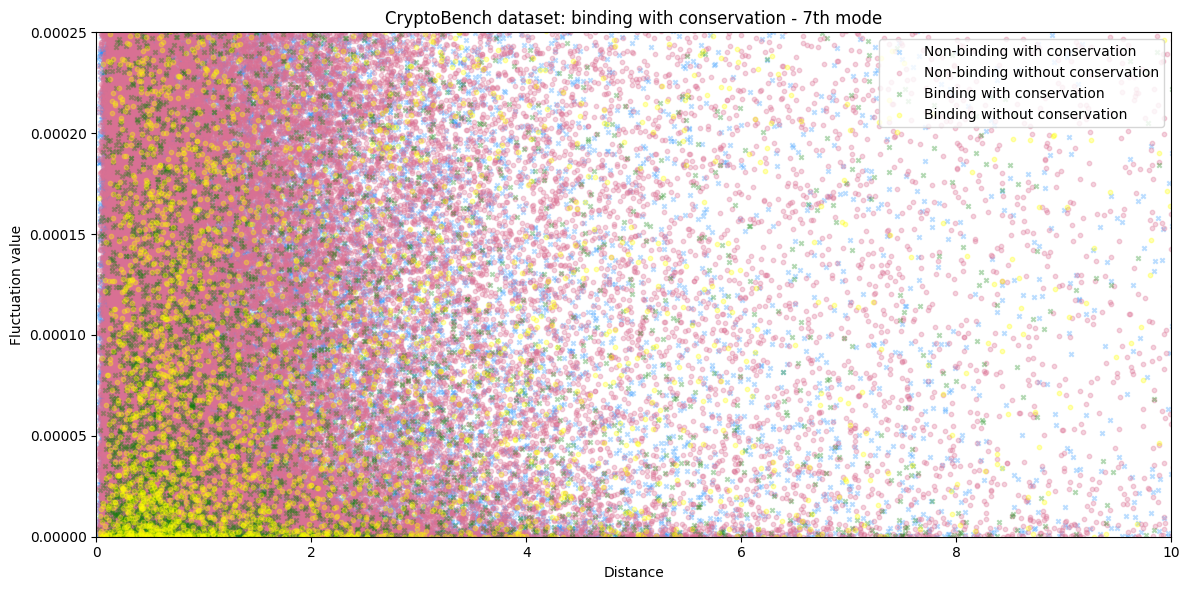

In [52]:
def scatterplot(input, title, mode, ylim=2e-04, xlim=10):
    plt.figure(figsize=(12,6))
    for (data, color, marker, label) in input:
        assert len(data[0][mode]) == len(data[1]), f'{len(data[0][mode])} != {len(data[1])}'
        plt.scatter(data[1], data[0][1], c=color, marker=marker, label=label, alpha=0.3, s=10)
    plt.title(title)
    plt.xlabel('Distance')
    plt.ylabel('Fluctuation value')
    plt.ylim(0, ylim)
    plt.xlim(0, xlim)
    plt.legend()
    plt.tight_layout()
    plt.show()

scatterplot([(nonbinding_fluctuation_with_conservation_cryptobench, 'dodgerblue','x', 'Non-binding with conservation'),
    (nonbinding_fluctuation_without_conservation_cryptobench, 'palevioletred','o', 'Non-binding without conservation'),
    (binding_fluctuation_with_conservation_cryptobench, 'green', 'x', 'Binding with conservation'),
    (binding_fluctuation_without_conservation_cryptobench, 'yellow','o', 'Binding without conservation')],
    mode=7, title='CryptoBench dataset: binding with conservation - 7th mode', ylim=2.5e-04)

This is a mess ..

Let's try [binned scatterplot](https://towardsdatascience.com/goodbye-scatterplot-welcome-binned-scatterplot-a928f67413e4/):

In [147]:
# create dataframe
import pandas as pd
import seaborn as sns
import binsreg # python3 -m pip install binsreg

CLIP_DISTANCE_THRESHOLD = 10
def binscatter(**kwargs):
    # Estimate binsreg
    est = binsreg.binsreg(**kwargs)
    
    # Retrieve estimates
    df_est = pd.concat([d.dots for d in est.data_plot])
    df_est = df_est.rename(columns={'x': kwargs.get("x"), 'fit': kwargs.get("y")})
    
    # Add confidence intervals
    if "ci" in kwargs:
        df_est = pd.merge(df_est, pd.concat([d.ci for d in est.data_plot]))
        df_est = df_est.drop(columns=['x'])
        df_est['ci'] = df_est['ci_r'] - df_est['ci_l']
    
    # Rename groups
    if "by" in kwargs:
        df_est['group'] = df_est['group'].astype(df[kwargs.get("by")].dtype)
        df_est = df_est.rename(columns={'group': kwargs.get("by")})

    return df_est

def scatterplot2(input, title, ylim=2e-04):
    plt.figure(figsize=(12,6))
    for i, (data, color, marker, label) in enumerate(input):
        plt.scatter(data['distance'], data['fluctuation'], c=color, marker=marker, label=label, alpha=(0.9 - (0.05 * i)))
        plt.errorbar('distance', 'fluctuation', yerr='ci', color=color, data=data, ls='', lw=1, alpha=(0.9 - (0.05 * i)), label=f'{label} - confidence interval')
    plt.title(title)
    plt.xlabel('Distance')
    plt.ylabel('Fluctuation value')
    plt.ylim(0, ylim)
    plt.legend()
    plt.tight_layout()
    plt.show()

def compute(mode):
    fluctuations = np.concatenate((
        nonbinding_fluctuation_with_conservation_cryptobench[0][mode],
        nonbinding_fluctuation_without_conservation_cryptobench[0][mode],
        binding_fluctuation_with_conservation_cryptobench[0][mode],
        binding_fluctuation_without_conservation_cryptobench[0][mode]))
    distances = np.concatenate((
        nonbinding_fluctuation_with_conservation_cryptobench[1],
        nonbinding_fluctuation_without_conservation_cryptobench[1],
        binding_fluctuation_with_conservation_cryptobench[1],
        binding_fluctuation_without_conservation_cryptobench[1]))
    conservation = np.concatenate((
        np.ones(len(nonbinding_fluctuation_with_conservation_cryptobench[1])),
        np.zeros(len(nonbinding_fluctuation_without_conservation_cryptobench[1])),
        np.ones(len(binding_fluctuation_with_conservation_cryptobench[1])),
        np.zeros(len(binding_fluctuation_without_conservation_cryptobench[1]))))
    binding = np.concatenate((
        np.zeros(len(nonbinding_fluctuation_with_conservation_cryptobench[1])),
        np.zeros(len(nonbinding_fluctuation_without_conservation_cryptobench[1])),
        np.ones(len(binding_fluctuation_with_conservation_cryptobench[1])),
        np.ones(len(binding_fluctuation_without_conservation_cryptobench[1]))))
    
    assert len(fluctuations) == len(distances) == len(conservation) == len(binding)
    
    df = pd.DataFrame({'fluctuation': fluctuations, 'distance': distances, 'conservation': conservation, 'binding': binding})
    
    del fluctuations, distances, conservation, binding
    
    df['distance'] = df['distance'].clip(0, CLIP_DISTANCE_THRESHOLD)
    
    df_est_binding = binscatter(x='distance', y='fluctuation', by='conservation', data=df[(df['binding'] == 1.0)], ci=(3,3))
    df_est_non_binding = binscatter(x='distance', y='fluctuation', by='conservation', data=df[(df['binding'] == 0.0)], ci=(3,3))
    
    scatterplot2([
        (df_est_non_binding[(df_est_non_binding['conservation'] == 1.0)], 'gold','x', 'Non-binding with conservation'),
        (df_est_non_binding[(df_est_non_binding['conservation'] == 0.0)], 'palevioletred','o', 'Non-binding without conservation'),
        (df_est_binding[(df_est_binding['conservation'] == 1.0)], 'green', 'x', 'Binding with conservation'),
        (df_est_binding[(df_est_binding['conservation'] == 0.0)], 'dodgerblue','o', 'Binding without conservation')],
        title=f'CryptoBench dataset: binding with conservation - {mode}th mode', ylim=2.5e-04)

/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.
/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:1079: UserWarning: Repeated knots. Some bins dropped.


<ggplot: (640 x 480)>


/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


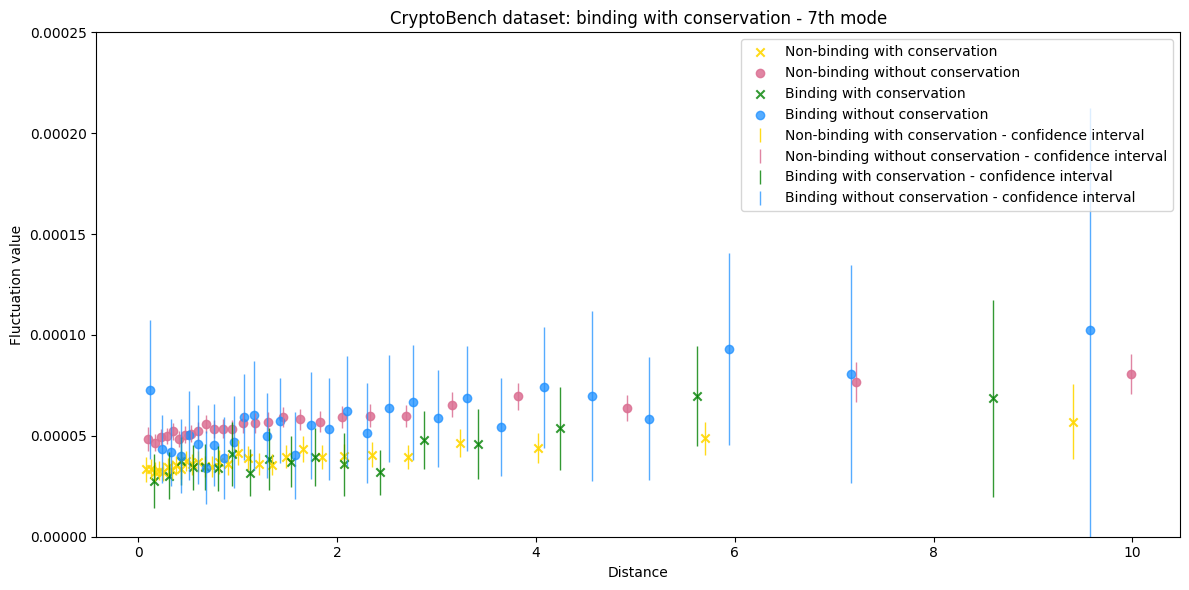

/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.
/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:1079: UserWarning: Repeated knots. Some bins dropped.


<ggplot: (640 x 480)>


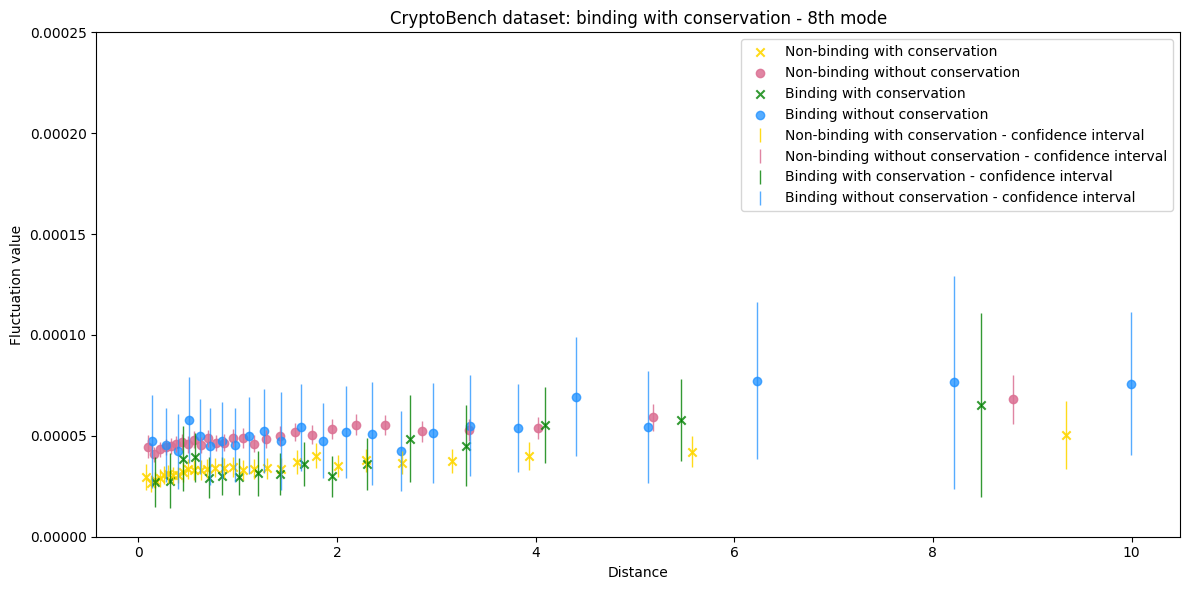

/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


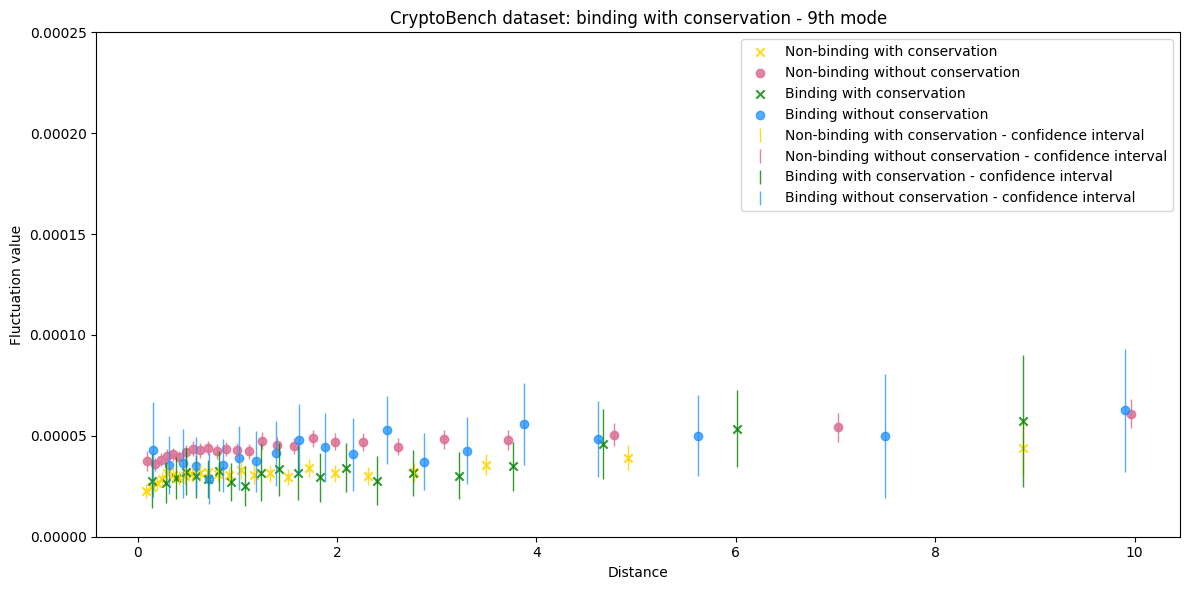

/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.
/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:1079: UserWarning: Repeated knots. Some bins dropped.


<ggplot: (640 x 480)>


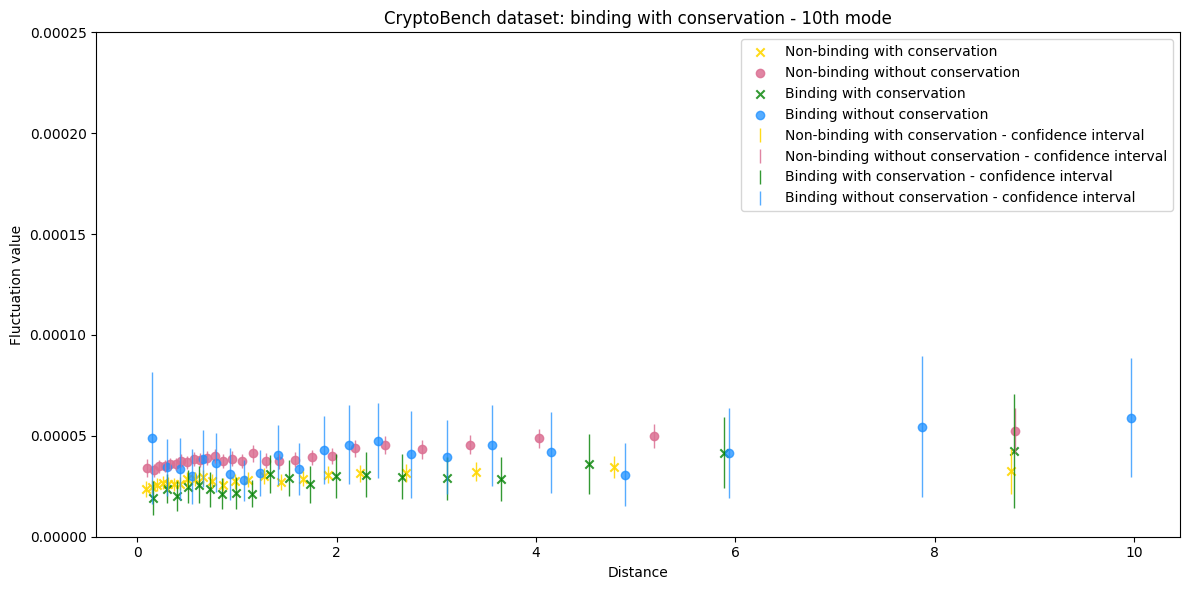

/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


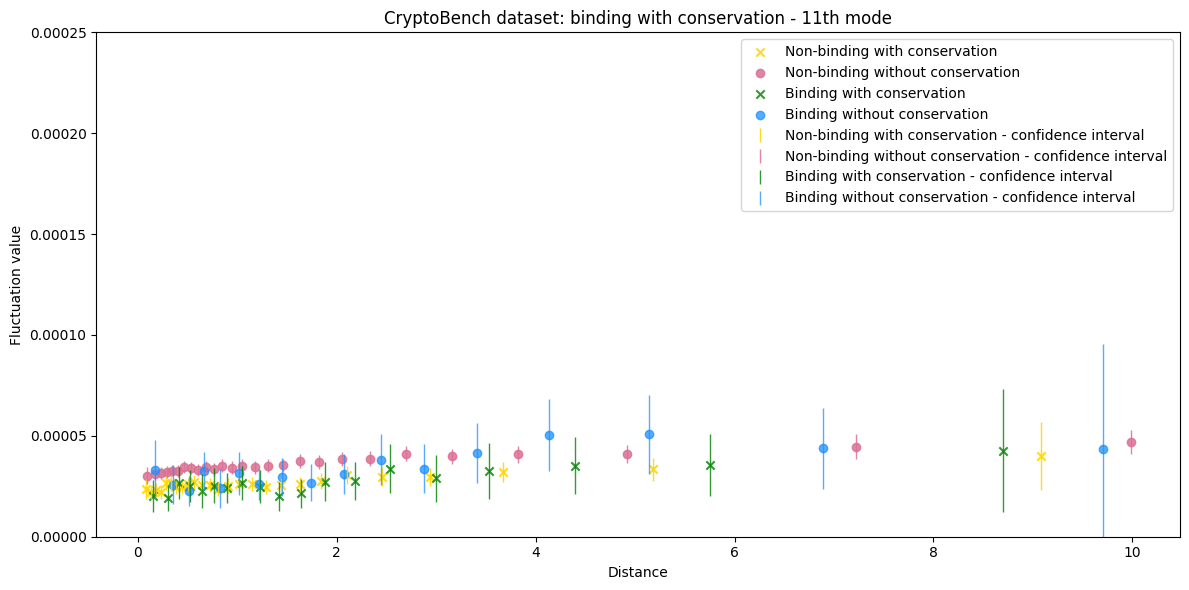

/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


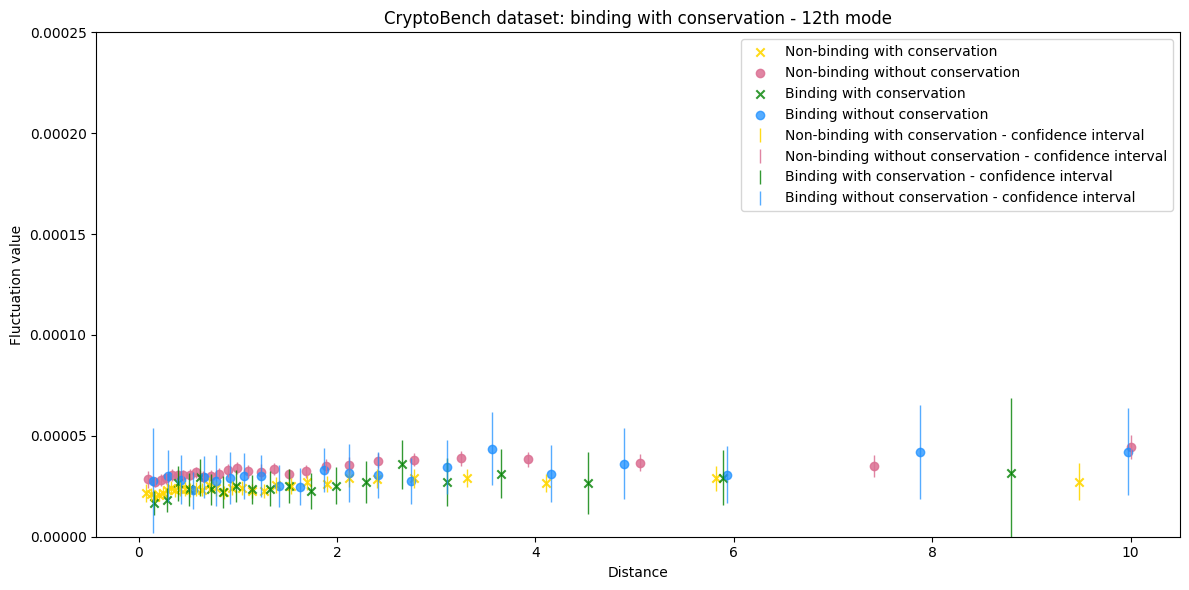

/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


/home/vit/.local/lib/python3.11/site-packages/binsreg/binsreg.py:941: UserWarning: To speed up computation, bin/degree selection uses a subsample of roughly max(5,000, 0.01n) observations if the sample size n>5,000. To use the full sample, set randcut=1.


<ggplot: (640 x 480)>


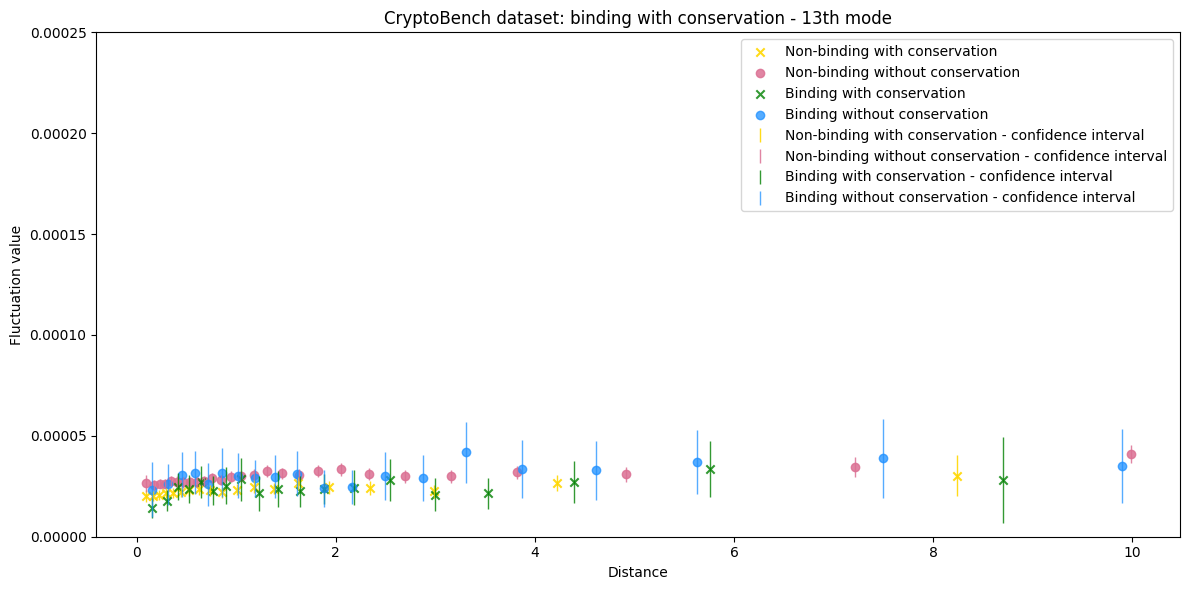

In [148]:
compute(mode=7)
compute(mode=8)
compute(mode=9)
compute(mode=10)
compute(mode=11)
compute(mode=12)
compute(mode=13)